In [2]:
%cd /home/ajay/coderep/representjs
%pwd

/home/ajay/coderep/representjs


'/home/ajay/coderep/representjs'

In [42]:
import seaborn as sns
sns.set_style("ticks")
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics
import torch

In [71]:
curves = {
    "Edit distance heuristic": "data/codeclone/ed_sim.pth",
#     "Transformer w/o pre-train": "data/codeclone/random_sim.pth",
    "MLM": "data/codeclone/mlm_sim.pth",
    "ContraCode": "data/codeclone/contrast_sim.pth",
    "ContraCode + MLM": "data/codeclone/hybrid_sim.pth",
}

[0.50072745 0.5004852  0.50060665 ... 0.96347032 0.96858639 1.        ]
[1.         0.99903148 0.99903148 ... 0.10217918 0.08958838 0.        ]
[0.63452953 0.6351834  0.63726646 ... 0.7310568  0.73105854 0.7310586 ]


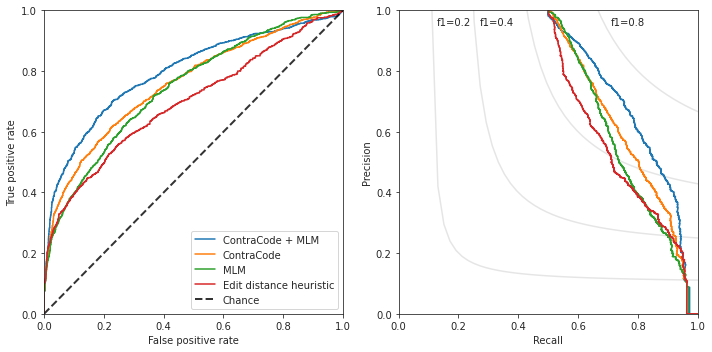

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# f_scores = np.linspace(0.2, 0.8, num=4)
f_scores = [0.2, 0.4, 0.6, 0.8]
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = axes[1].plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
#     axes[1].annotate('f1={0:.1f}'.format(f_score), xy=(0.875, y[45] + 0.02))
    if f_score != 0.6:
        axes[1].annotate('f1={0:.1f}'.format(f_score), xy=(1 / (2/f_score - 1)*1.05+0.01, 0.95))

for label, path in list(curves.items())[::-1]:
    data = torch.load(path)
    y_true = data["y_true"]
    y_scores = data["y_scores"]

    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_scores)
    axes[0].step(fpr, tpr, label=label)
    
    precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, 1 / (1 + np.exp(-y_scores)))
#     precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_scores)
    axes[1].step(precision, recall, label=label)
    
    if label == "MLM":
        print(precision)
        print(recall)
        print(thresholds)
#         m = np.stack((precision, recall, thresholds))
#         print(m)

x = [0, 1]
y = [0, 1]
axes[0].plot(x, y, linestyle='--', lw=2, color="k",
        label='Chance', alpha=.8)
# axes[0].fill_between(x, 0, y, linestyle='--', lw=2, color="k",
#         label='Chance', alpha=.4)
axes[0].set_xlabel("False positive rate")
axes[0].set_ylabel("True positive rate")
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.0])

axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.0])

axes[0].legend()
plt.tight_layout()
# plt.show()
plt.savefig("data/codeclone_plot.pdf", dpi=96)